<a href="https://colab.research.google.com/github/leptoquark/data-analysis/blob/main/data_analysis_v4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


        host="93.145.57.62"
        port="9874"
        database="cgmanager_ai"
        user="sixtema_ai"
        password="zQ^xd4b-yq,Dp9E<aR{)

In [5]:
import getpass

host = str(input("host: "));
port = str(input("port: "));
database = str(input("database: "));
user = str(input("user: "))
password = getpass.getpass('password: ');

KeyboardInterrupt: Interrupted by user

In [2]:
!pip install psycopg2-binary


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 9.7 MB/s eta 0:00:00


Questo snippet vale per la connessione a posgtresql

In [ ]:
import psycopg2

def sql_to_dataframe(conn, query, column_names):
   cursor = conn.cursor()
   try:
      cursor.execute(query)
   except (Exception, psycopg2.DatabaseError) as error:
      print("Error: %s" % error)
   cursor.close()
   return 1
   tuples_list = cursor.fetchall()
   cursor.close()
   df = pd.DataFrame(tuples_list, columns=column_names)
   return df

try:
    connection = psycopg2.connect(
        host=host,
        port=port,
        database=database,
        user=user,
        password=password
    )
    cursor = connection.cursor()
    print("Connessione stabilita correttamente")
except Exception as e:
    print("Errore nella connessione alla base di dati:", e)

query = "SELECT * FROM table"
column_names = ['column1','column2','column3']
df = sql_to_dataframe(connection, query, column_names)
connection.close()
df.head()

Questo snippet vale per la connessione a google sheet

In [2]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

workbook = gc.open('data-analysis')

sheet_titles = []
for sheet in workbook.worksheets():
  sheet_titles.append(sheet.title)
sheet_titles

dict_of_sheets = {}
for sheet_title in sheet_titles:
  sheet = workbook.worksheet(sheet_title)
  values = sheet.get_all_values()
  dict_of_sheets[sheet_title] = values
dict_of_sheets.keys()


dict_keys(['Foglio1'])

In [3]:
import pandas as pd

df = pd.DataFrame.from_records(dict_of_sheets.get('Foglio1'))

new_header = df.iloc[0]
df = df[1:]
df.columns = new_header

In [27]:
df['cash_balance'] = pd.to_numeric(df['cash_balance'], errors='coerce')
df['importo_rata'] = pd.to_numeric(df['importo_rata'], errors='coerce')
df['importo_capitale'] = pd.to_numeric(df['importo_capitale'], errors='coerce')
df['importo_interessi'] = pd.to_numeric(df['importo_interessi'], errors='coerce')
df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

pd.set_option('display.max_columns', None)

df.head()


,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,9/6/1969,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,18/4/2023,26/5/2023,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,2.0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,2/7/1967,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,18/4/2023,26/5/2023,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,2.0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,18/8/1942,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,18/4/2023,26/5/2023,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,FALSE,FALSE,,5/23/23 11:57,0,0,0,0,0,1.0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,18/10/1976,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,18/4/2023,26/5/2023,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,FALSE,FALSE,,5/23/23 11:57,0,0,0,0,0,2.0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,20/11/1974,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,18/4/2023,26/5/2023,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,2.0


In [28]:
df.describe(include='all')

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin
count,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787,787.000000,787.000000,787.000000,787.000000,787.000000,787.0,787.000000,787.000000,787.000000,787.000000,0.0,787,787.000000,787.000000,787.0,787.000000,779.000000,787,787,787,787,787,787,787,787,787.000000,787.000000,787.000000,787.000000,787.000000,787.000000
unique,3,786,3,2,4,4,3,3,6,6,3,3,5,478,124,162,133,32,13,6,63,39,661,1,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64,NaN,NaN,NaN,NaN,NaN,27,65,39,5,2,2,93,107,NaN,NaN,NaN,NaN,NaN,NaN
top,Cliente 5,8709453,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,,PALERMO (PA),90135,PALERMO,PA,SICILIA,,26/5/2023,23/6/2023,455,,,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,Utente 470,31/5/2023,23/6/2023,Esattore INTERNO,TRUE,FALSE,,,NaN,NaN,NaN,NaN,NaN,NaN
freq,561,2,569,571,569,569,578,578,570,570,756,470,756,31,229,46,264,264,593,777,256,256,7,787,786,786,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,651,NaN,NaN,NaN,NaN,NaN,261,256,256,303,569,707,651,486,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.143583,5002.607433,5017.640191,1915.078983,142.328653,0.0,-2.024651,7075.047827,5002.607433,5118.559657,NaN,NaN,0.239784,0.143266,0.0,26.400610,0.193838,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.341804,0.007624,0.033037,0.401525,1.298602,1.604828
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.541855,7210.546421,7200.835978,3791.542452,652.417407,0.0,14.739610,10088.761611,7210.546421,7132.024856,NaN,NaN,6.726785,1.414004,0.0,92.534897,0.464319,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.747391,0.133242,0.192549,0.915736,2.753861,2.710854
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,-106.620000,0.000000,-200.000000,0.0,-133.250000,-106.620000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,225.000000,250.000000,0.000000,0.000000,0.0,0.000000,281.250000,225.000000,560.000000,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1969.890000,1969.890000,504.700000,0.000000,0.0,0.000000,2713.880000,1969.890000,2000.000000,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,6576.790000,6576.790000,1926.510000,38.060000,0.0,0.000000,9397.795000,6576.790000,6868.705000,NaN,NaN,0.000000,0.000000,0.0,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,1.000000,2.000000


In [21]:
import requests
import zipfile
import io

zipconfini="http://www.istat.it/storage/cartografia/confini_amministrativi/non_generalizzati/Limiti01012018.zip"
r = requests.get(zipconfini)
z = zipfile.ZipFile(io.BytesIO(r.content))
z.extractall()


KeyboardInterrupt: 

<Axes: >

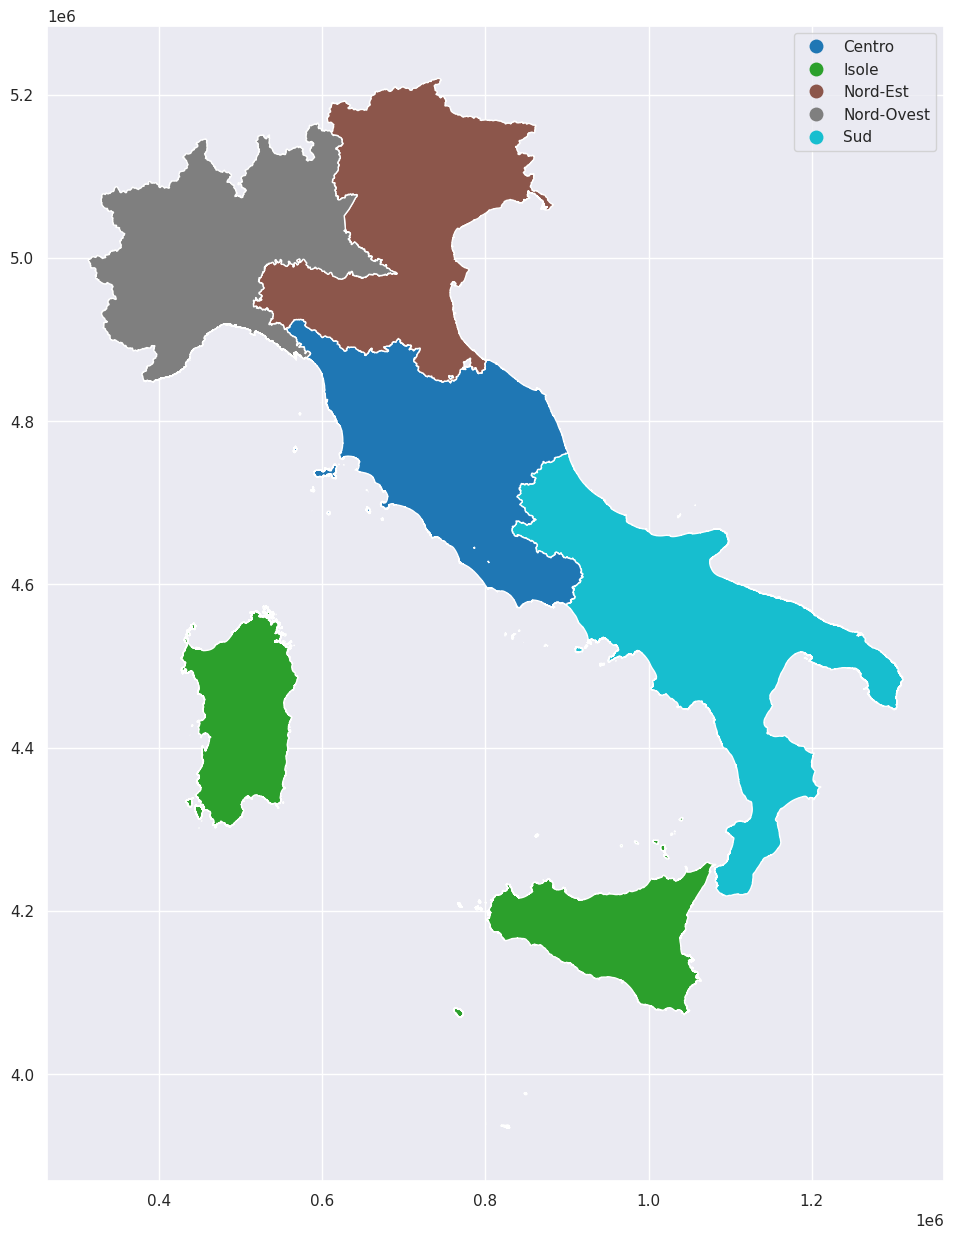

In [20]:
import geopandas as gpd
import os
#istruzione necessarie per visualizzare le mappe in jupyter
%matplotlib inline

ripartizioni_geografiche = gpd.read_file("Limiti01012018" + os.sep + "RipGeo01012018" + os.sep + "RipGeo01012018_WGS84.shp")
ripartizioni_geografiche.plot(column='DEN_RIP',legend=True,figsize=(15,15))

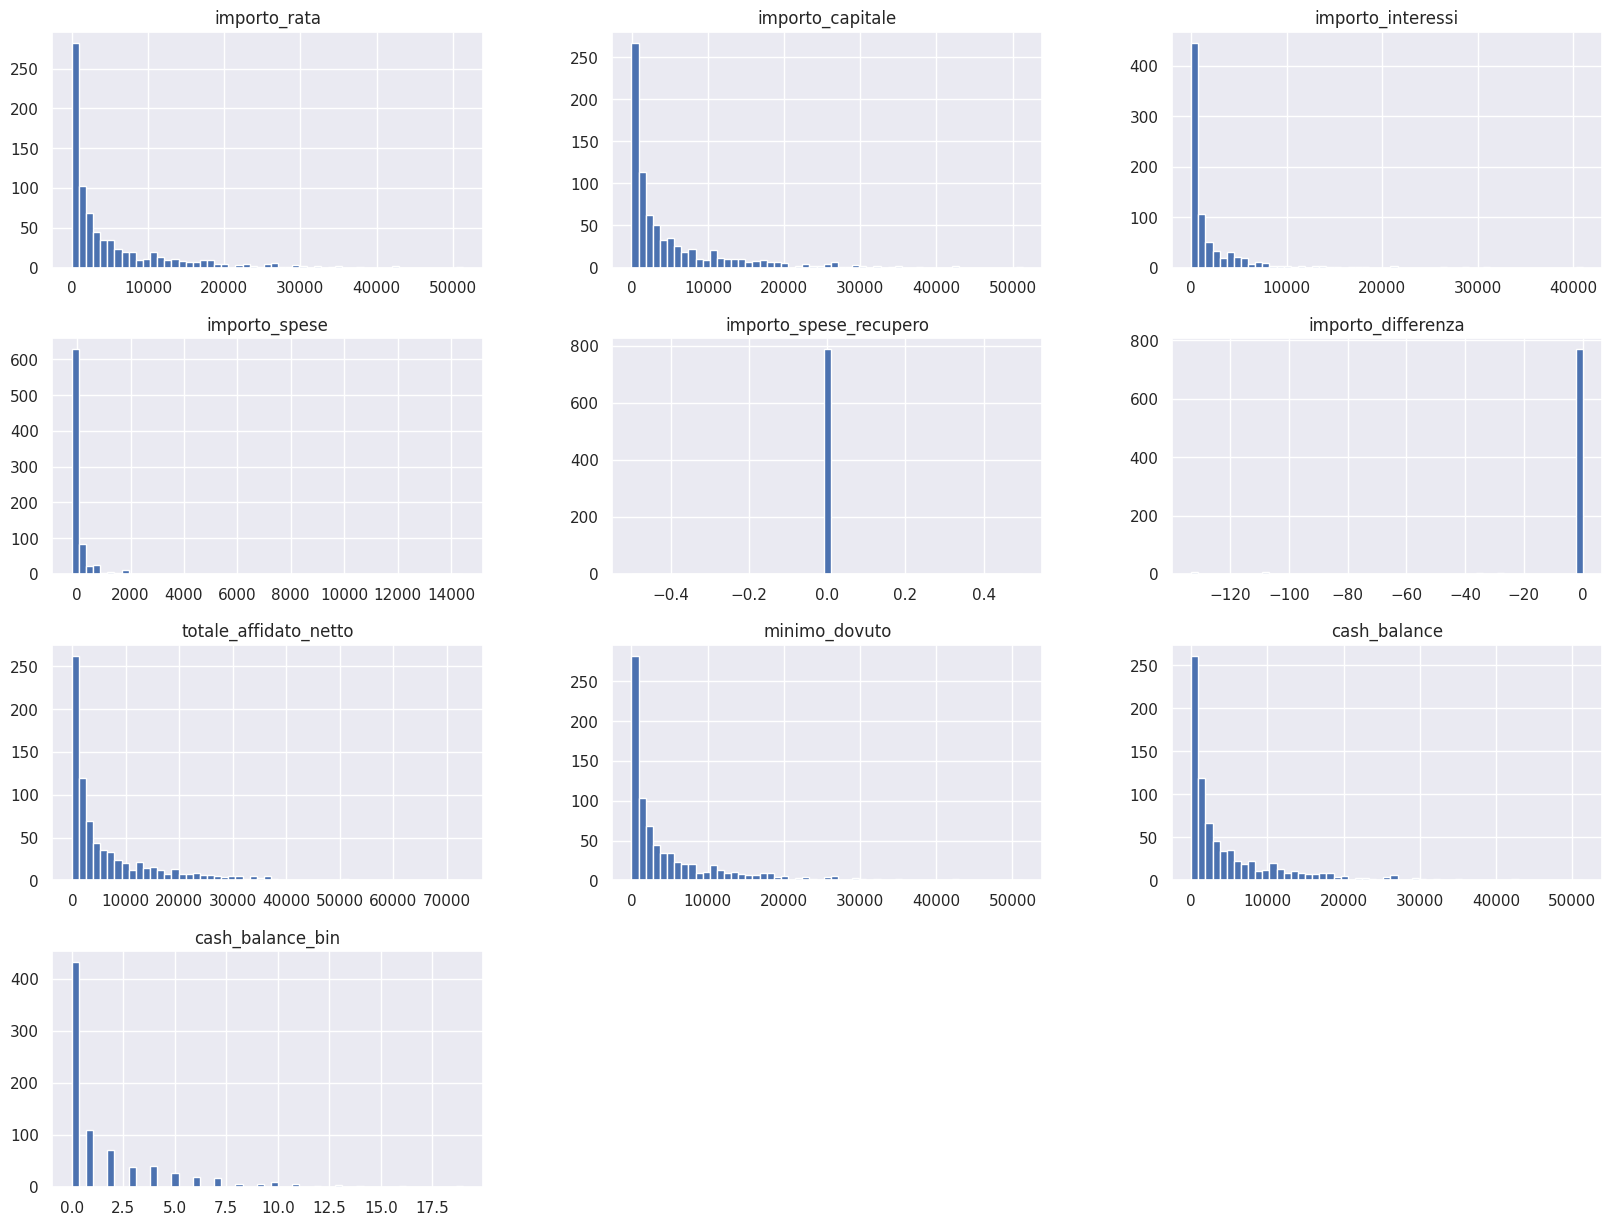

In [14]:
import matplotlib as mpl
import matplotlib.pyplot as plt

df.hist(bins=55, figsize=(20,15))
plt.show();

In [31]:
X=df[['incasso_tot']]

from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=20,
                       encode='ordinal',
                       strategy='uniform',
                       subsample=None)
est.fit(X)
Xt = est.transform(X)

learn = df.drop(columns='cash_balance')
df['incasso_tot_bin'] = Xt

df.head()

,azienda_codice,id_pratica,committente_codice,tp_profilo,tp_intervento_cod,tp_intervento,prodotto_cod,prodotto,livello_cod,livello,tipo_soggetto,sesso,tipo_societa,data_nascita,luogo_nascita,cap,citta,provincia,regione,recapito_lavoro,data_affido,scadenza_mandato,pratica_num,tipo_garante,citta_garante,cap_garante,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_capitale,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,esattore_codice,dataaffidoesattore,datascadaffesat,profilo_esattore,abilitato_sms,presenza_foto,data_ultimo_incasso,data_ultima_nota,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin,incasso_tot_bin
1,Cliente 5,8392,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,F,Privato,9/6/1969,CATANIA (CT),95022,ACI CATENA,CT,SICILIA,,18/4/2023,26/5/2023,130007,,,,1,6055.77,6055.77,0.00,0.0,0.0,0.0,6055.77,6055.77,6055.77,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,0.0,0.0
2,Cliente 5,8394,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,2/7/1967,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,18/4/2023,26/5/2023,130019,,,,1,5261.59,5261.59,1205.84,0.0,0.0,0.0,6467.43,5261.59,5261.59,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,0.0,0.0
3,Cliente 5,8395,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,18/8/1942,CATANIA (CT),95025,ACI SANT ANTONIO,CT,SICILIA,,18/4/2023,26/5/2023,130020,,,,1,3653.34,3653.34,701.44,0.0,0.0,0.0,4354.78,3653.34,3653.34,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,FALSE,FALSE,,5/23/23 11:57,0,0,0,0,0,0.0,0.0
4,Cliente 5,8416,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,18/10/1976,PATERNO' (CT),95047,PATERNO,CT,SICILIA,,18/4/2023,26/5/2023,130024,,,,1,5574.04,5574.04,0.00,0.0,0.0,0.0,5574.04,5574.04,5574.04,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,FALSE,FALSE,,5/23/23 11:57,0,0,0,0,0,0.0,0.0
5,Cliente 5,8411,Committente 20,Finanziario,MIX,GESTIONE MISTA (fonia + domiciliare),,,,,Persona Fisica,M,Privato,20/11/1974,CATANIA (CT),95045,MISTERBIANCO,CT,SICILIA,,18/4/2023,26/5/2023,130063,,,,1,5495.72,5495.72,1252.53,0.0,0.0,0.0,6748.25,5495.72,5495.72,NaN,0,0.0,0.0,0,0.0,0.0,Utente 468,16/5/2023,26/5/2023,Esattore ESTERNO,TRUE,FALSE,,5/23/23 11:57,0,0,0,0,0,0.0,0.0


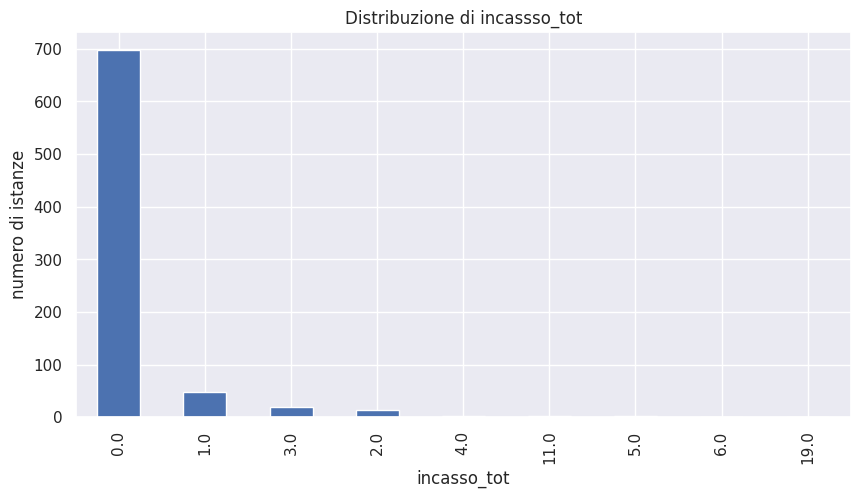

In [35]:
df.incasso_tot_bin.value_counts().nlargest(40).plot(kind='bar', figsize=(10,5))
plt.title("Distribuzione di incassso_tot")
plt.ylabel('numero di istanze')
plt.xlabel('incasso_tot');

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier

df['importo_spese'] = pd.to_numeric(df['importo_spese'], errors='coerce')
df['importo_spese_recupero'] = pd.to_numeric(df['importo_spese_recupero'], errors='coerce')
df['importo_differenza'] = pd.to_numeric(df['importo_differenza'], errors='coerce')
df['totale_affidato_netto'] = pd.to_numeric(df['totale_affidato_netto'], errors='coerce')
df['minimo_dovuto'] = pd.to_numeric(df['minimo_dovuto'], errors='coerce')

df['rate_arretrate'] = pd.to_numeric(df['rate_arretrate'], errors='coerce')

df['incasso_tot'] = pd.to_numeric(df['incasso_tot'], errors='coerce')
df['rate_accodate'] = pd.to_numeric(df['rate_accodate'], errors='coerce')
df['incasso_interessi'] = pd.to_numeric(df['incasso_interessi'], errors='coerce')
df['incasso_spese'] = pd.to_numeric(df['incasso_spese'], errors='coerce')
df['incasso_spese_rec'] = pd.to_numeric(df['incasso_spese_rec'], errors='coerce')
df['rate_recuperate'] = pd.to_numeric(df['rate_recuperate'], errors='coerce')

df['num_sms'] = pd.to_numeric(df['num_sms'], errors='coerce')
df['num_lettere'] = pd.to_numeric(df['num_lettere'], errors='coerce')
df['num_email'] = pd.to_numeric(df['num_email'], errors='coerce')
df['num_chiamate'] = pd.to_numeric(df['num_chiamate'], errors='coerce')
df['num_esiti_fonia'] = pd.to_numeric(df['num_esiti_fonia'], errors='coerce')

X,y=df[[
        'importo_rata',
        'importo_capitale',
        'importo_interessi',
        'importo_spese',
        'importo_spese_recupero',
        'importo_differenza',
        'totale_affidato_netto',
        'minimo_dovuto',
        'rate_arretrate',
        'rate_accodate',
        'incasso_interessi',
        'incasso_spese',
        'incasso_spese_rec',
        'rate_recuperate',
        'num_sms',
        'num_lettere',
        'num_email',
        'num_chiamate',
        'num_esiti_fonia'
        ]],df.incasso_tot_bin
print(X.shape)

clf = ExtraTreesClassifier(n_estimators=100, random_state=42)
clf = clf.fit(X,y)
print(clf.feature_importances_)

tree_importance_sorted_idx = np.argsort(clf.feature_importances_)
tree_indices = np.arange(0,len(clf.feature_importances_))+0.5
fig=plt.figure(figsize=(8,8))
ax1=fig.add_subplot(1,1,1)
ax1.barh(tree_indices, clf.feature_importances_[tree_importance_sorted_idx], height = 0.7)
ax1.set_yticks(tree_indices)

ax1.set_yticklabels(X.columns[tree_importance_sorted_idx])

ax1.set_ylim((0,len(clf.feature_importances_)))
ax1.set_title("Selezione delle caratteristiche numeriche più importanti", fontsize=20)


(787, 19)


ValueError: Input X contains NaN.
ExtraTreesClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

<ipython-input-37-24336b8fa163>:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  c= df.corr()


,rate_arretrate,importo_rata,importo_capitale,importo_interessi,importo_spese,importo_spese_recupero,importo_differenza,totale_affidato_netto,minimo_dovuto,cash_balance,rate_accodate,incasso_interessi,incasso_spese,incasso_spese_rec,incasso_tot,rate_recuperate,num_sms,num_lettere,num_email,num_chiamate,num_esiti_fonia,cash_balance_bin,incasso_tot_bin
0,,,,,,,,,,,,,,,,,,,,,,,
rate_arretrate,1.000000,-0.179706,-0.168061,-0.128016,-0.041859,NaN,-0.348967,-0.170771,-0.179706,-0.098965,NaN,-0.009458,-0.026882,NaN,0.364073,0.332487,0.161401,0.196281,0.381274,0.173400,0.367696,0.374830,0.374830
importo_rata,-0.179706,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,NaN,-0.024707,-0.067844,NaN,-0.190478,-0.284373,-0.304498,0.032410,-0.115665,-0.157426,-0.179488,-0.154587,-0.154587
importo_capitale,-0.168061,0.999860,1.000000,0.590445,0.167502,NaN,0.091037,0.946480,0.999860,0.985832,NaN,-0.024814,-0.068148,NaN,-0.183246,-0.279384,-0.303076,0.035039,-0.109865,-0.155447,-0.174994,-0.146965,-0.146965
importo_interessi,-0.128016,0.590589,0.590445,1.000000,0.265765,NaN,0.067806,0.814434,0.590589,0.586441,NaN,-0.014909,-0.051241,NaN,-0.136231,-0.206216,-0.228999,-0.011542,-0.082069,-0.149856,-0.154456,-0.109419,-0.109419
importo_spese,-0.041859,0.167467,0.167502,0.265765,1.000000,NaN,0.025850,0.284101,0.167467,0.166120,NaN,0.023201,-0.019942,NaN,-0.044601,-0.077642,-0.094936,-0.003176,-0.026843,0.026270,0.031585,-0.033061,-0.033061
importo_spese_recupero,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
importo_differenza,-0.348967,0.092868,0.091037,0.067806,0.025850,NaN,1.000000,0.092132,0.092868,0.083381,NaN,0.004903,0.013938,NaN,-0.145165,-0.133730,-0.151808,0.007870,-0.100226,-0.072817,-0.139918,-0.149402,-0.149402
totale_affidato_netto,-0.170771,0.946432,0.946480,0.814434,0.284101,NaN,0.092132,1.000000,0.946432,0.934774,NaN,-0.021814,-0.069187,NaN,-0.184874,-0.281986,-0.308521,0.020466,-0.110995,-0.165570,-0.180907,-0.148156,-0.148156
minimo_dovuto,-0.179706,1.000000,0.999860,0.590589,0.167467,NaN,0.092868,0.946432,1.000000,0.984654,NaN,-0.024707,-0.067844,NaN,-0.190478,-0.284373,-0.304498,0.032410,-0.115665,-0.157426,-0.179488,-0.154587,-0.154587


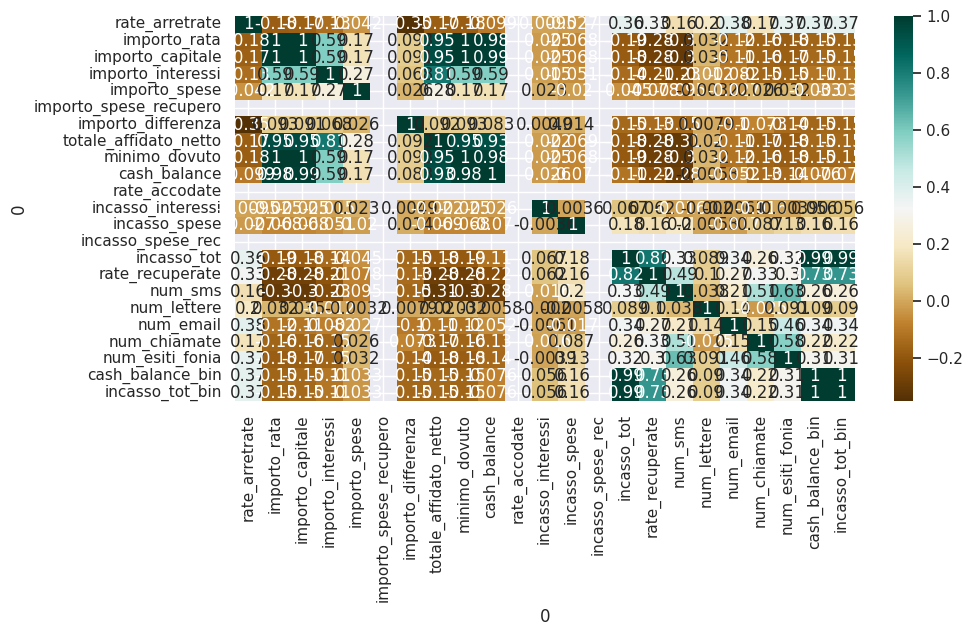

In [37]:
import seaborn as sns
%matplotlib inline
sns.set(color_codes=True)

plt.figure(figsize=(10,5))
c= df.corr()
sns.heatmap(c,cmap="BrBG",annot=True)
c

In [ ]:
attributes = df.columns;

from pandas.plotting import scatter_matrix
#attributes = ["importo_rata", "importo_interessi", "cash_balance", "importo_differenza"]
scatter_matrix(df[attributes], figsize = (30,24))



ValueError: zero-size array to reduction operation minimum which has no identity

In [17]:
!pip install ydata-profiling
!pip install lazypredict

from sklearn.model_selection import train_test_split
from ydata_profiling import ProfileReport

profile = ProfileReport(df, title="Profilazione dataset")
profile.to_notebook_iframe()

ImportError: cannot import name 'Buffer' from 'typing_extensions' (/usr/local/lib/python3.10/dist-packages/typing_extensions.py)

 # Regressione

In [ ]:
profile.to_file(output_file="eda_analysis.html")

df_drop = df.drop(columns=['cash_balance_bin','cash_balance'])
Xm = pd.get_dummies(df_drop)
ym = df.cash_balance

X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size=0.3,
                                                    shuffle=True)

import lazypredict
from lazypredict.Supervised import LazyRegressor

# Create the classifier object
clf_r = LazyRegressor(verbose=-1, ignore_warnings=True, custom_metric=None)

models, predictions = clf_r.fit(X_train, X_test, y_train, y_test)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

100%|██████████| 42/42 [01:26<00:00,  2.06s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1230
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 87
[LightGBM] [Info] Start training from score 5235.566966
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
Lars,2741132061702615328466054352471156850688.00,-23938445674445296414449794730343673102336.00,998533539738604235915264.00,1.67
SGDRegressor,592152600440854.62,-5171298769104234.00,464103130309.05,0.28
GaussianProcessRegressor,1.18,-0.56,8071.25,3.41
LinearSVR,1.16,-0.42,7682.85,0.17
SVR,1.14,-0.20,7062.47,0.97
NuSVR,1.12,-0.03,6538.06,0.49
DummyRegressor,1.11,-0.00,6465.47,0.11
MLPRegressor,1.10,0.10,6128.36,14.05
KernelRidge,1.09,0.22,5692.66,0.40


# Classificazione

In [ ]:


df_drop = df.drop(columns=['cash_balance_bin','cash_balance'])
Xm = pd.get_dummies(df_drop)
ym = df.cash_balance_bin

X_train, X_test, y_train, y_test = train_test_split(Xm, ym,
                                                    test_size=0.3,
                                                    shuffle=True)

from lazypredict.Supervised import LazyClassifier
clf_c = LazyClassifier(verbose=-1, ignore_warnings=True, custom_metric=None)

models, predictions = clf_c.fit(X_train, X_test, y_train, y_test)

 90%|████████▉ | 26/29 [00:23<00:03,  1.18s/it]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000663 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1241
[LightGBM] [Info] Number of data points in the train set: 550, number of used features: 92
[LightGBM] [Info] Start training from score -0.596185
[LightGBM] [Info] Start training from score -2.090411
[LightGBM] [Info] Start training from score -2.284567
[LightGBM] [Info] Start training from score -3.051822
[LightGBM] [Info] Start training from score -2.942622
[LightGBM] [Info] Start training from score -3.314186
[LightGBM] [Info] Start training from score -3.825012
[LightGBM] [Info] Start training from score -3.825012
[LightGBM] [Info] Start training from score -5.616771
[LightGBM] [Info] Start training from score -4.700480
[LightGBM] [Info] Start training from score -4.518159
[LightGBM] [Info] Start training from score -4.923624
[

100%|██████████| 29/29 [00:25<00:00,  1.13it/s]


In [ ]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.97,0.87,None,0.97,0.34
DecisionTreeClassifier,0.97,0.85,None,0.98,0.14
LGBMClassifier,0.96,0.83,None,0.96,1.65
ExtraTreesClassifier,0.83,0.44,None,0.82,0.55
RandomForestClassifier,0.87,0.42,None,0.86,0.80
AdaBoostClassifier,0.75,0.20,None,0.68,0.74
ExtraTreeClassifier,0.58,0.19,None,0.57,0.12
PassiveAggressiveClassifier,0.52,0.18,None,0.46,2.11
LinearSVC,0.54,0.17,None,0.45,1.60


In [ ]:
predictions

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
BaggingClassifier,0.97,0.87,None,0.97,0.34
DecisionTreeClassifier,0.97,0.85,None,0.98,0.14
LGBMClassifier,0.96,0.83,None,0.96,1.65
ExtraTreesClassifier,0.83,0.44,None,0.82,0.55
RandomForestClassifier,0.87,0.42,None,0.86,0.80
AdaBoostClassifier,0.75,0.20,None,0.68,0.74
ExtraTreeClassifier,0.58,0.19,None,0.57,0.12
PassiveAggressiveClassifier,0.52,0.18,None,0.46,2.11
LinearSVC,0.54,0.17,None,0.45,1.60
